In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
anime=pd.read_csv('anime.csv')
# anime.head()

In [3]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

## EDA

In [5]:
numeric_columns = [
    "Score", "Ranked", "Popularity", "Members", "Favorites", "Watching", 
    "Completed", "On-Hold", "Dropped", "Plan to Watch"
] + [f"Score-{i}" for i in range(1, 11)]

In [6]:
for col in numeric_columns:
    mask = (anime[col].astype(str) == 'Unknown')
    anime.loc[mask, col] = np.nan
    anime[col] = pd.to_numeric(anime[col], errors='coerce')

object_columns = [col for col in anime.columns if col not in numeric_columns]
anime[object_columns] = anime[object_columns].astype('object')

anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  object 
 1   Name           17562 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17562 non-null  object 
 8   Aired          17562 non-null  object 
 9   Premiered      17562 non-null  object 
 10  Producers      17562 non-null  object 
 11  Licensors      17562 non-null  object 
 12  Studios        17562 non-null  object 
 13  Source         17562 non-null  object 
 14  Duration       17562 non-null  object 
 15  Rating         17562 non-null  object 
 16  Ranked         15800 non-null  float64
 17  Popularity     17562 non-null  float64
 18  Member

In [7]:
anime.isnull().sum()

MAL_ID              0
Name                0
Score            5141
Genres              0
English name        0
Japanese name       0
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1762
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
Plan to Watch       0
Score-10          437
Score-9          3167
Score-8          1371
Score-7           503
Score-6           511
Score-5           584
Score-4           977
Score-3          1307
Score-2          1597
Score-1           459
dtype: int64

In [8]:
anime.describe()

,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
count,12421.000000,15800.00000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000,17125.000000,14395.000000,16191.000000,17059.000000,17051.000000,16978.000000,16585.000000,16255.000000,15965.00000,17103.000000
mean,6.509999,7895.21000,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227,2546.182715,3905.437027,4846.905194,3997.244329,1964.125682,990.303982,453.539162,212.773547,128.39524,123.075250
std,0.886717,4557.31849,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963,17081.840149,19891.721835,20597.991435,14275.126598,6462.018509,3256.272467,1748.658929,877.018359,573.74176,674.672906
min,1.850000,0.00000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,5.930000,3944.00000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000,7.000000,7.000000,7.000000,12.000000,16.000000,19.000000,10.000000,7.000000,5.00000,6.000000
50%,6.520000,7896.00000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000,39.000000,71.000000,92.000000,140.000000,144.000000,111.000000,50.000000,27.000000,18.00000,16.000000
75%,7.140000,11845.25000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000,381.000000,735.000000,1073.000000,1370.500000,910.500000,528.750000,213.000000,104.000000,63.00000,56.000000
max,9.190000,15780.00000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000,714811.000000,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.00000,33750.000000


In [9]:
columns=['Genres','Type',
 'Aired',
 'Premiered',
 'Producers',
 'Licensors',
 'Studios',
 'Source',
 'Duration','Rating', 'Ranked']

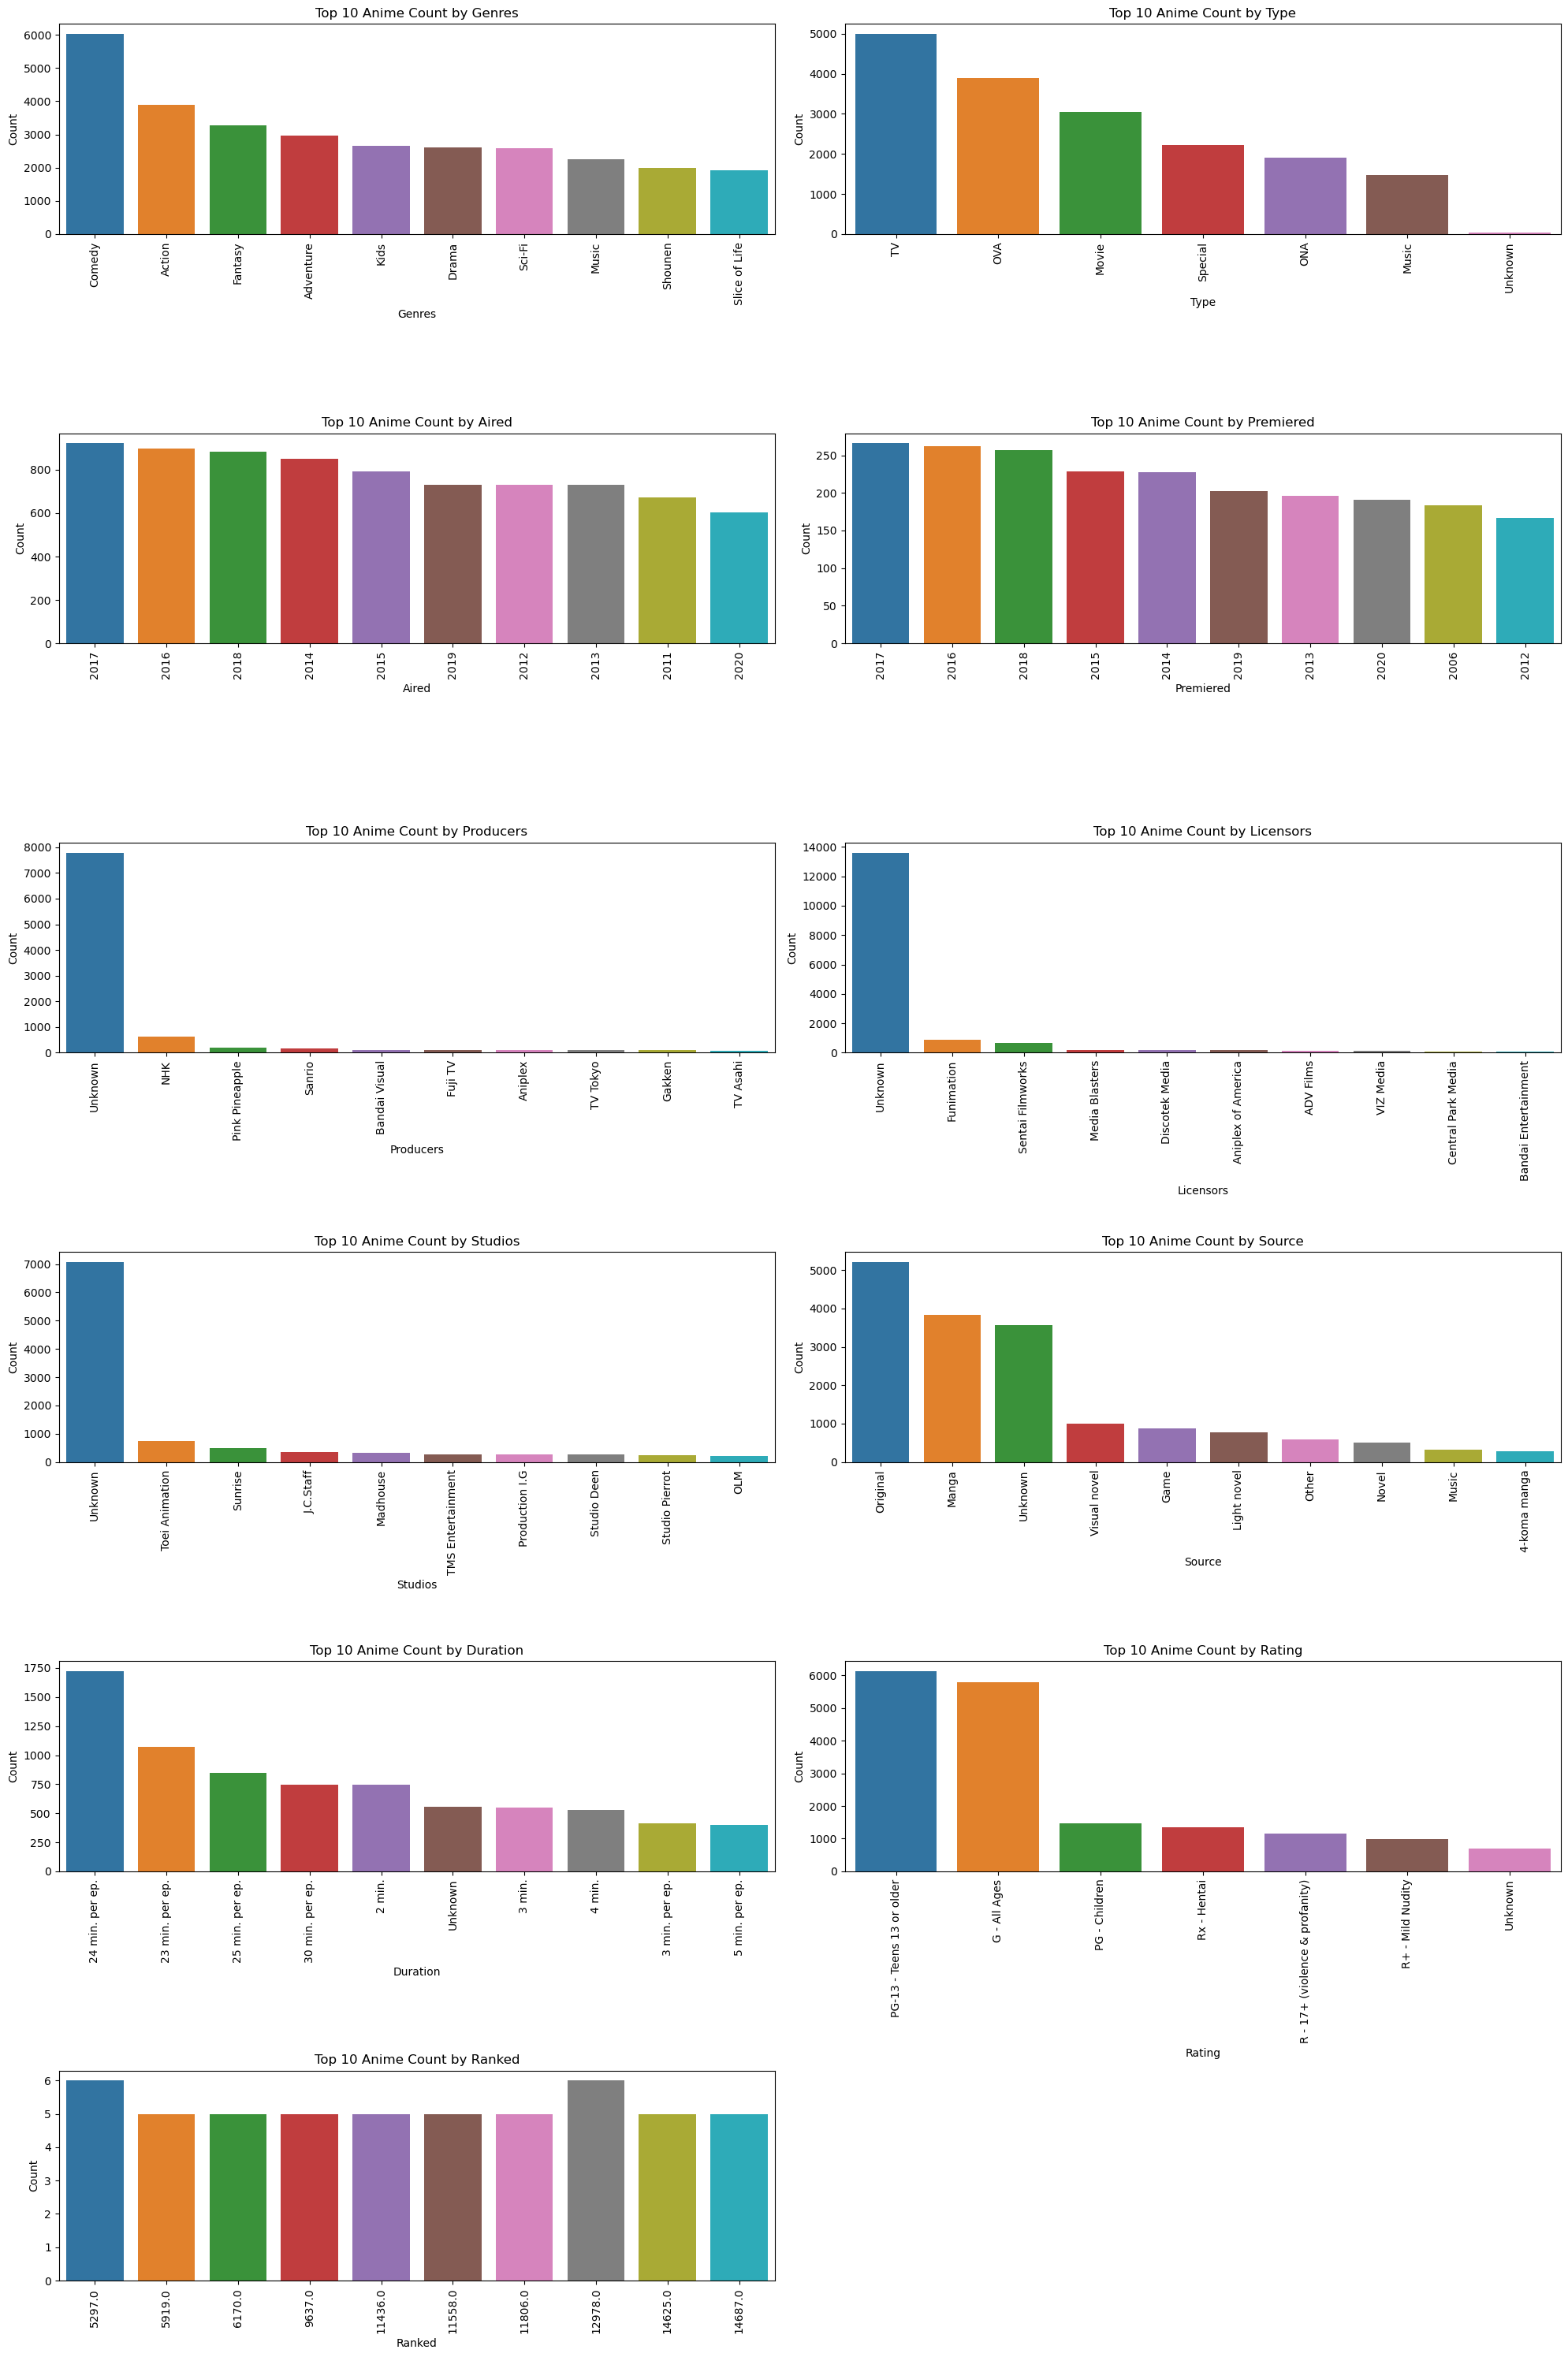

In [10]:
plt.figure(figsize=(20, 30)) 
top_n = 10

for i, col in enumerate(columns, 1):
    plt.subplot(6, 2, i)
    
    if col == 'Genres':
        all_genres = ", ".join(anime[col].dropna()).split(", ")
        genre_counts = pd.Series(all_genres).value_counts().head(top_n)
        sns.barplot(x=genre_counts.index, y=genre_counts.values)

    elif col in ['Aired', 'Premiered']:
        years = anime[col].str.extract(r'(\d{4})')[0]
        year_counts = years.value_counts().head(top_n)
        sns.barplot(x=year_counts.index, y=year_counts.values)
    else:
        col_counts = anime[col].value_counts().head(top_n)
        sns.barplot(x=col_counts.index, y=col_counts.values)
    
    plt.title(f'Top {top_n} Anime Count by {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [11]:
def plot_column_counts(df, x_col, y_col='count'):
    col_counts = df[x_col].value_counts().reset_index()
    col_counts.columns = [x_col, y_col]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=col_counts, x=x_col, y=y_col)
    plt.title(f"Counts of Unique Values in {x_col}")
    plt.xticks(rotation=90)
    plt.show()

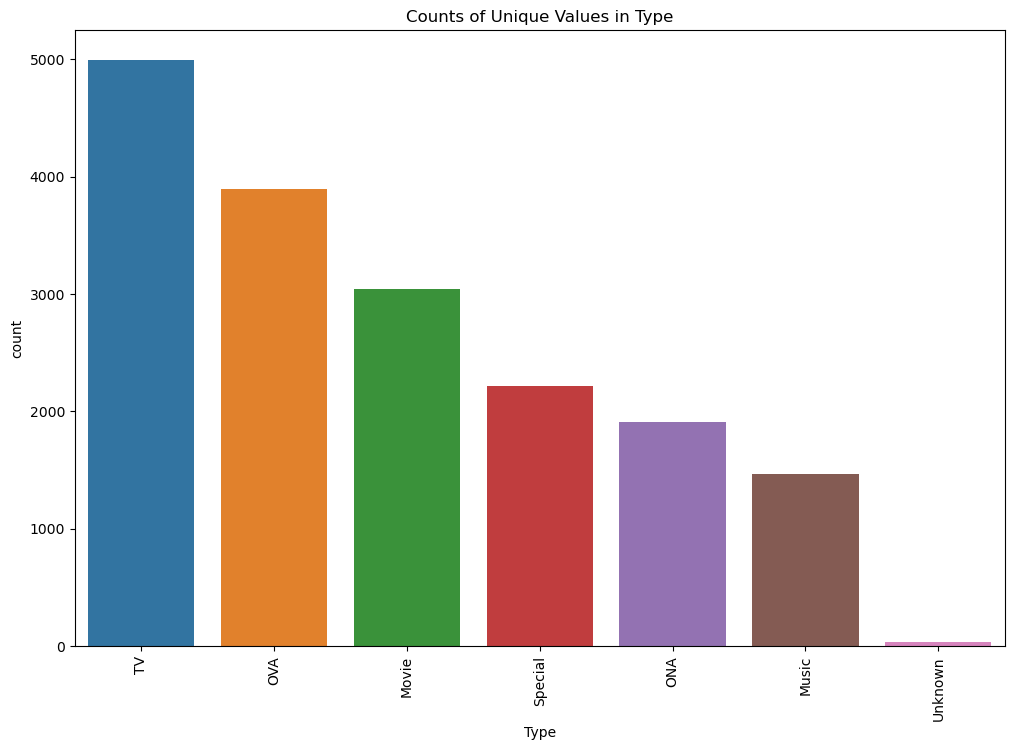

In [12]:
plot_column_counts(anime, 'Type')

In [13]:
def plot_scatter(df, x_col, y_col):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f"Scatter plot of {x_col} vs. {y_col}")
    plt.show()

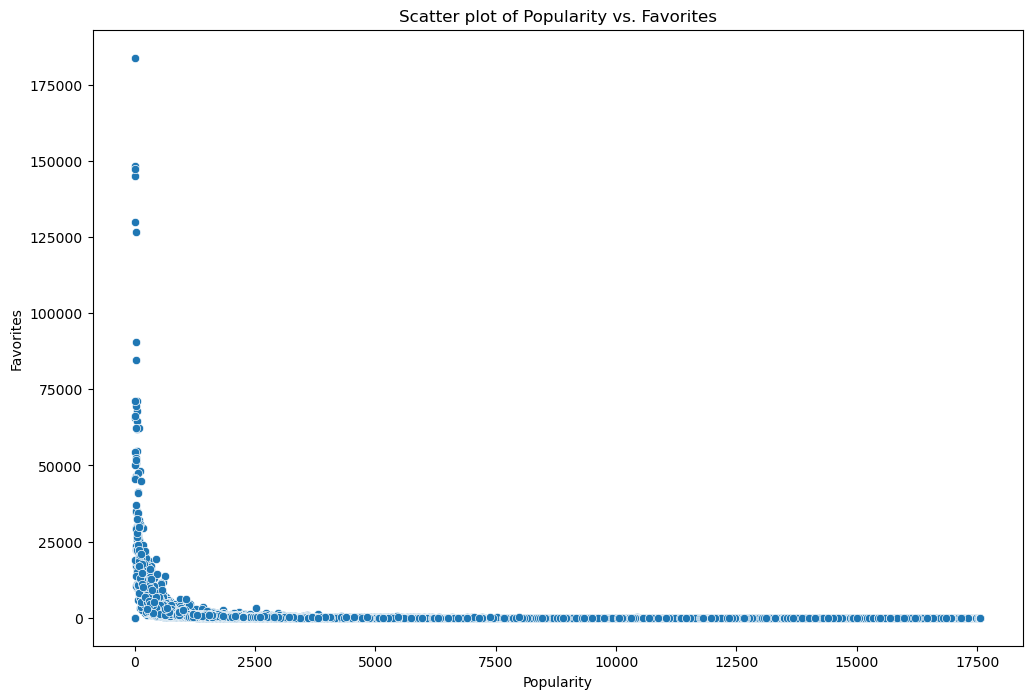

In [14]:
plot_scatter(anime, 'Popularity', 'Favorites')

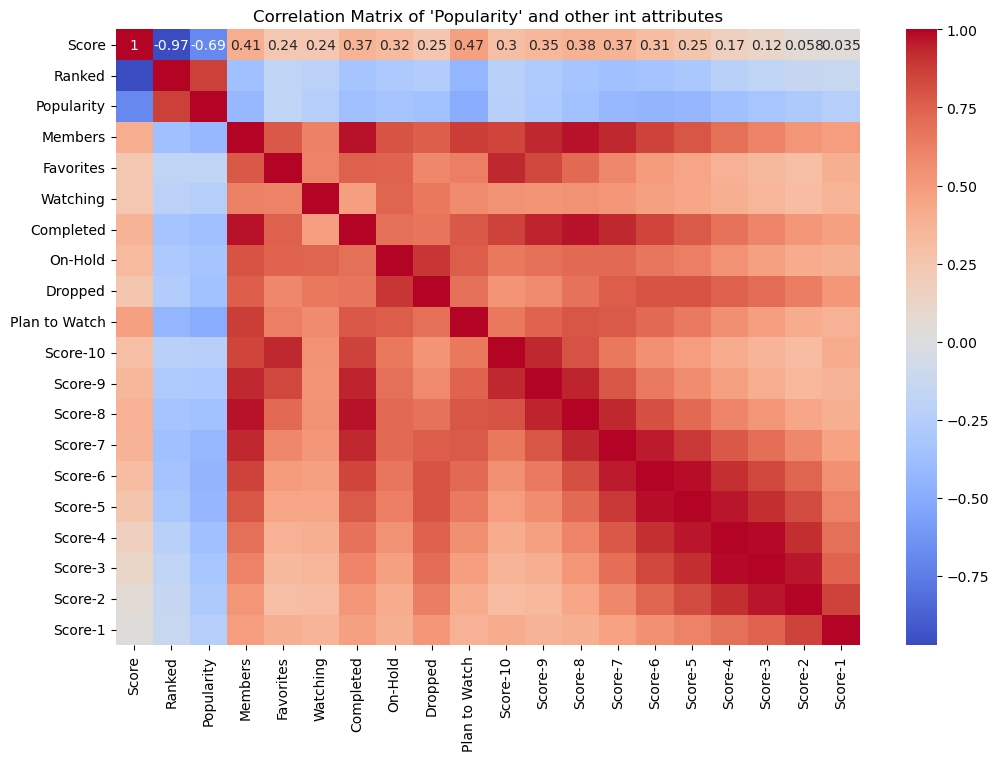

Popularity       1.000000
Ranked           0.862017
Favorites       -0.185933
Score-10        -0.238783
Score-1         -0.241882
Watching        -0.245257
Score-2         -0.293555
Score-9         -0.300772
Score-3         -0.329518
On-Hold         -0.338071
Score-8         -0.362817
Dropped         -0.363674
Score-4         -0.364249
Completed       -0.373770
Members         -0.418699
Score-7         -0.425199
Score-5         -0.430290
Score-6         -0.444358
Plan to Watch   -0.497297
Score           -0.694536
Name: Popularity, dtype: float64

In [15]:
int_columns = anime.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = anime[int_columns].corr()

popularity_corr = correlation_matrix["Popularity"].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of 'Popularity' and other int attributes")
plt.show()

popularity_corr

In [16]:
anime[['Popularity','Plan to Watch']].head()

,Popularity,Plan to Watch
0,39.0,329800.0
1,518.0,57964.0
2,201.0,146918.0
3,1467.0,33719.0
4,4369.0,3394.0


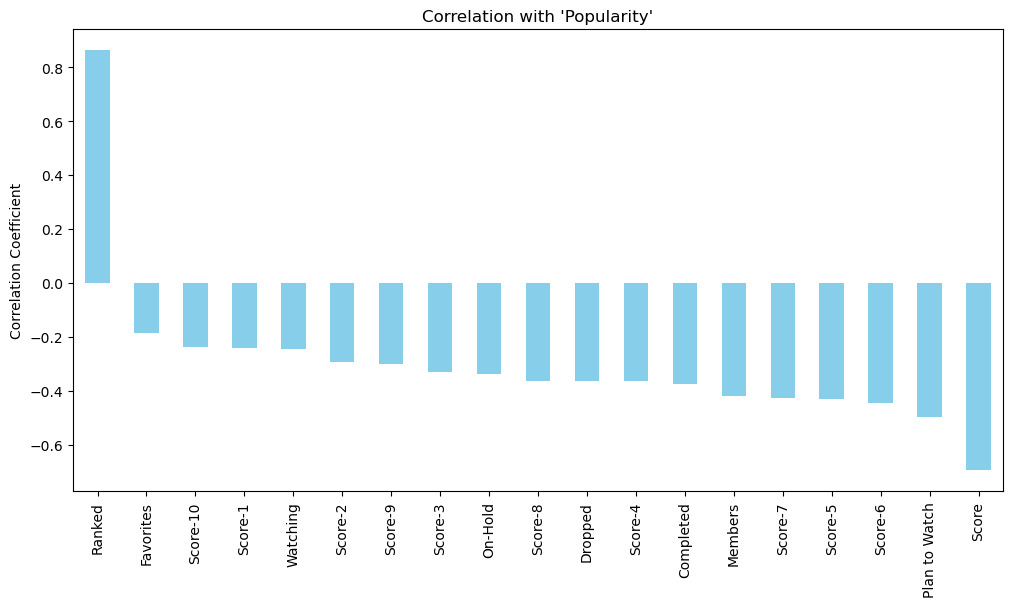

In [17]:
plt.figure(figsize=(12, 6))
popularity_corr.drop('Popularity').plot(kind='bar', color='skyblue')
plt.title("Correlation with 'Popularity'")
plt.ylabel("Correlation Coefficient")
plt.show()

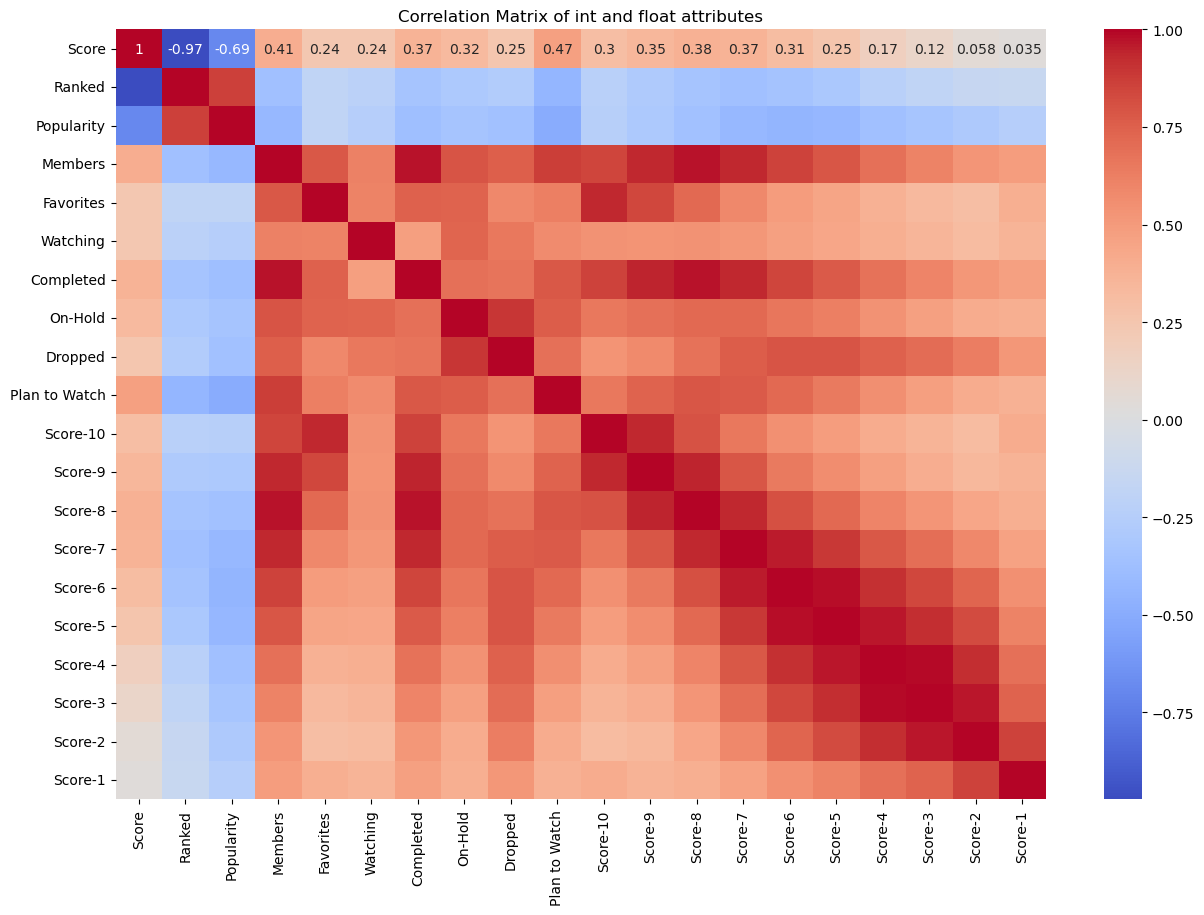

In [18]:
correlation_matrix = anime.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of int and float attributes")
plt.show()

## Data Preprocessing

In [19]:
selected_columns = ['MAL_ID', 'Name', 'Score', 'Genres', 'Type', 'Episodes', 'Studios', 'Source', 'Rating', 'Members']
anime_selected = anime[selected_columns]
anime_selected.head(3)

,MAL_ID,Name,Score,Genres,Type,Episodes,Studios,Source,Rating,Members
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Sunrise,Original,R - 17+ (violence & profanity),1251960.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,Bones,Original,R - 17+ (violence & profanity),273145.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Madhouse,Manga,PG-13 - Teens 13 or older,558913.0


In [20]:
anime_selected['Score'] = pd.to_numeric(anime_selected['Score'], errors='coerce')
anime_selected['Episodes'] = pd.to_numeric(anime_selected['Episodes'], errors='coerce')

C:\Users\potto\AppData\Local\Temp\ipykernel_12852\2639691139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_selected['Score'] = pd.to_numeric(anime_selected['Score'], errors='coerce')
C:\Users\potto\AppData\Local\Temp\ipykernel_12852\2639691139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_selected['Episodes'] = pd.to_numeric(anime_selected['Episodes'], errors='coerce')


In [21]:
anime_selected['Score'].fillna(anime_selected['Score'].mean(), inplace=True)
anime_selected['Episodes'].fillna(anime_selected['Episodes'].mean(), inplace=True)

anime_selected.head(3)

C:\Users\potto\AppData\Local\Temp\ipykernel_12852\51535829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_selected['Score'].fillna(anime_selected['Score'].mean(), inplace=True)
C:\Users\potto\AppData\Local\Temp\ipykernel_12852\51535829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_selected['Episodes'].fillna(anime_selected['Episodes'].mean(), inplace=True)


,MAL_ID,Name,Score,Genres,Type,Episodes,Studios,Source,Rating,Members
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,Sunrise,Original,R - 17+ (violence & profanity),1251960.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,Bones,Original,R - 17+ (violence & profanity),273145.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,Madhouse,Manga,PG-13 - Teens 13 or older,558913.0


## Modeling

In [22]:
genres_df = anime_selected['Genres'].str.get_dummies(sep=', ')
genres_df.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
from sklearn.neighbors import NearestNeighbors


nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11)
nn_model.fit(genres_df)


idx = anime_selected[anime_selected['Name'] == "Monster"].index[0]


distances, indices = nn_model.kneighbors(genres_df.iloc[idx].values.reshape(1, -1))


recommended_animes_nn = anime_selected['Name'].iloc[indices[0][1:]]
recommended_animes_nn

c:\Users\potto\anaconda3\envs\test_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


1009                        Monster Extra: Hottan
6674                               Dwaeji-ui Wang
1380                                   Black Jack
7500     Higurashi no Naku Koro ni Kaku: Outbreak
3806          Hello Harinezumi: Satsui no Ryoubun
299                               Mousou Dairinin
14495                   Tokyo Ghoul:re 2nd Season
8646                                  Tokyo Ghoul
13670                              Tokyo Ghoul:re
9664                               Tokyo Ghoul √A
Name: Name, dtype: object